In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


import pickle
import joblib

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

<h2> Entreno el modelo </h2>

In [20]:
#me traigo el dataset de entrenamiento

diamonds= pd.read_csv('./data/diamonds_train_sab_2.csv')

diamonds.head()

,Index_ID,Clarity,Color,Cut,Depth,x,y,z,Table,Price,City,Carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,VS2,J,Premium,62.4,6.83,6.79,4.25,58.0,4268,Dubai,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,VS2,H,Very Good,63.0,4.35,4.38,2.75,57.0,505,Kimberly,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,VS1,G,Fair,65.5,5.62,5.53,3.65,55.0,2686,Las Vegas,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,SI1,D,Good,63.8,4.68,4.72,3.00,56.0,738,Kimberly,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,SI1,G,Ideal,60.5,6.55,6.51,3.95,59.0,4882,Dubai,1.02


In [21]:
# creo una nueva columna para quitarme x, y z
diamonds['xyz'] = diamonds['x'] * diamonds['y']*diamonds['z']

In [24]:
#me quito valores de x, y, z que sean 0
diamonds= diamonds[diamonds['xyz']!=0]
len(diamonds)

40439

In [27]:
#me quito los valores de carat altos
diamonds= diamonds[diamonds['Carat']<3]
len(diamonds)

40409

<AxesSubplot:xlabel='Price', ylabel='Carat'>

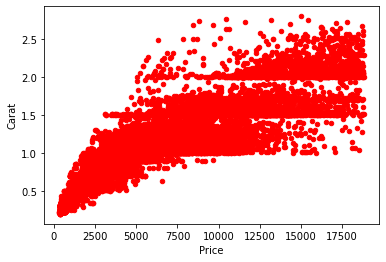

In [28]:
diamonds.plot(kind='scatter',x='Price', y='Carat',color='red')

In [42]:
diamonds.head(1)

,Index_ID,Clarity,Color,Cut,Depth,x,y,z,Table,Price,City,Carat,xyz
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,VS2,J,Premium,62.4,6.83,6.79,4.25,58.0,4268,Dubai,1.21,197.096725


In [43]:
#columnas con las que me quedo
X_train_original= diamonds [['Carat', 'Cut','City','Color', 'Table', 'Depth', 'xyz' ]]
y= diamonds['Price']


In [46]:
# get dummies, escalado y entrenar mi modelo

X_train_dummies= pd.get_dummies(X_train_original)

scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train_dummies)

X= X_train_scaled 
y= diamonds['Price']

In [47]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Compruebo mi error </h2>

In [48]:
model= RandomForestRegressor(max_depth=12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)**0.5

print('rmse RandomForestRegressor', rmse)

rmse RandomForestRegressor 1128.485308539063


<h2> Hago la prediccion </h2>

In [68]:
test_df= pd.read_csv('./data/diamonds_test.csv')
test_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam


<AxesSubplot:>

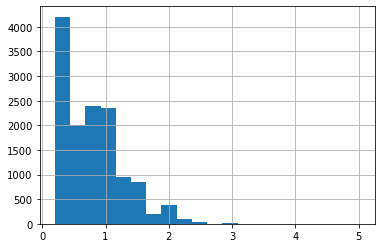

In [13]:
test_df['carat'].hist(bins=20)

In [34]:
len(test_df)

13485

,id,carat,cut,color,clarity,depth,table,x,y,z,city
94,94,5.01,Fair,J,I1,65.5,59.0,10.74,10.54,6.98,Luxembourg
8355,8355,3.01,Premium,J,SI2,60.7,59.0,9.35,9.22,5.64,Zurich
8976,8976,3.04,Very Good,I,SI2,63.2,59.0,9.14,9.07,5.75,Zurich
9838,9838,3.65,Fair,H,I1,67.1,53.0,9.53,9.48,6.38,London
12305,12305,3.67,Premium,I,I1,62.4,56.0,9.86,9.81,6.13,Luxembourg
12392,12392,3.01,Fair,I,SI2,65.8,56.0,8.99,8.94,5.90,Kimberly


<h2> Preparo el dataframe como he hecho con el train </h2>

In [69]:
# creo una nueva columna para quitarme x, y z
test_df['xyz'] = test_df['x'] * test_df['y']*test_df['z']

#columnas con las que me quedo
test_df_mod= test_df [['carat', 'cut','city','color', 'table', 'depth', 'xyz' ]]

# get dummies y escalado

test_df_mod= pd.get_dummies(test_df_mod)

scaler=StandardScaler()
X_test= scaler.fit_transform(test_df_mod)


In [70]:
#hago la predicción de los valores de y con mi modelo
y_pred= model.predict(X_test)
len(y_pred)

13485

In [72]:
# creo el csv en el formato que hay que subirlo
submission = pd.DataFrame({'id': test_df['id'] , 'price': y_pred})
submission.to_csv('./data_submission/submission_3_31.csv',index=False)